## Nb simplifié pour lecture data et utilisation xarray

In [1]:
%matplotlib notebook
import os
import glob
import pandas as pd

import matplotlib.pyplot as plt

import xarray as xr
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Recuperation de la BD de travail

In [2]:
# Repertoire de travail
rep = '/home/arnlaure/Terrain/Quebec/umi2017-2018/'

# Recuperation de la BD des hauteurs de neige
umi = xr.open_dataset(os.path.join(rep,"RLS_quebec_fulldata/data/umi-height-mnt-mnt-nc4.nc"))
print(umi)


<xarray.Dataset>
Dimensions:  (time: 250, x: 258, y: 496)
Coordinates:
  * time     (time) datetime64[ns] 2017-11-04 2017-11-06 ... 2019-09-02
  * x        (x) float64 0.0 0.06 0.12 0.18 0.24 ... 15.24 15.3 15.36 15.42
  * y        (y) float64 -16.14 -16.08 -16.02 -15.96 ... 13.38 13.44 13.5 13.56
Data variables:
    z        (time, y, x) float64 ...


## Visu base de donnees

<IPython.core.display.Javascript object>


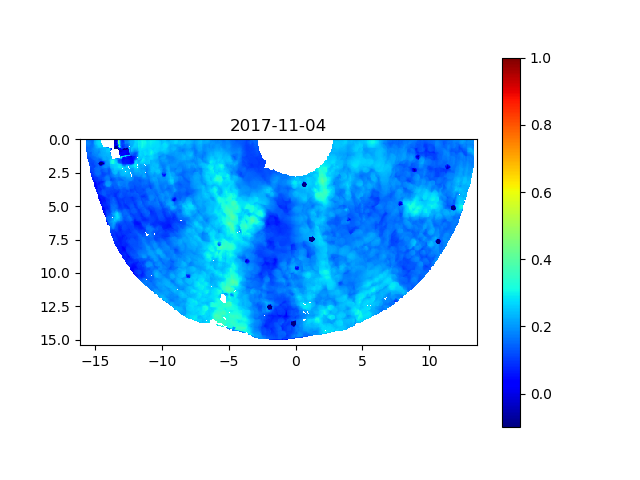

<IPython.core.display.Javascript object>


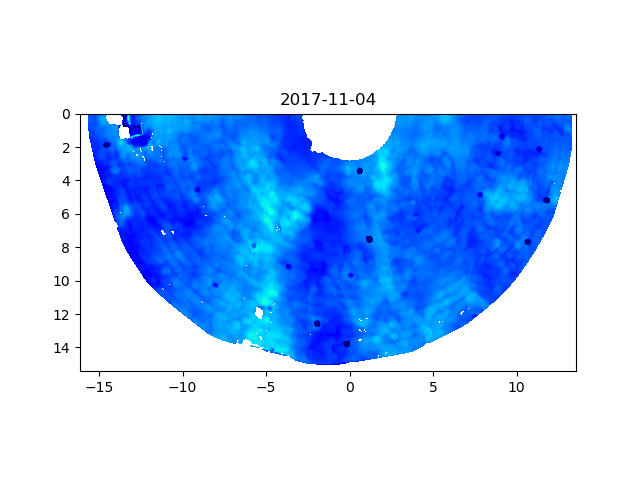

interactive(children=(IntSlider(value=0, description='time', layout=Layout(width='700px'), max=249), Output(la…

In [3]:
from algo import plotting

m = plotting.plot_map(umi.sel(time='2017-11-04'),vmin=-0.1, vmax=1, cmap=plt.get_cmap('jet'))
plt.colorbar(mappable=m) 
plt.title('2017-11-04')

plotting.plot_map_interactive(umi, vmin=-0.1, vmax=1.2, cmap=plt.get_cmap('jet')) 

# Evolution temporelle des hauteurs de neige 


<IPython.core.display.Javascript object>


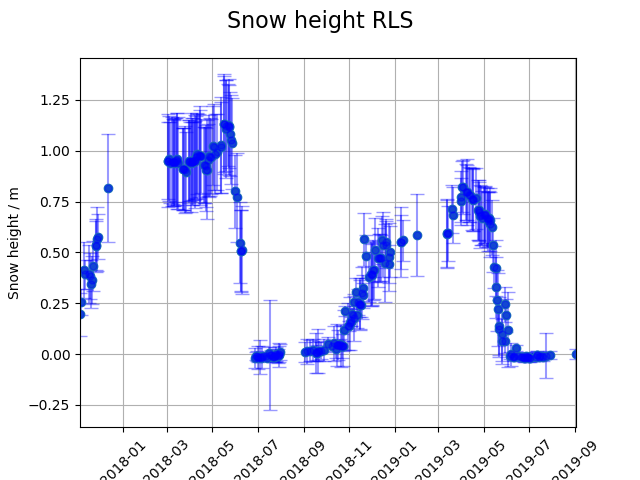

In [4]:
plt.figure()
plt.suptitle('Snow height RLS',fontsize=16)
umiz=umi['z'].sel(time=slice('2017-11-01','2019-09-15'))
m = umiz.mean(dim=('x', 'y')).values
s = umiz.std(dim=('x', 'y')).values
dt = umiz.time.values
plt.errorbar(dt, m, yerr=s, capsize=5, fmt='o',color='b',
                 markersize=5, alpha=0.4)
plt.plot(dt, m, 'o')
plt.grid()
plt.xlim((umi.z.time[0].values, umiz.time[-1].values))
plt.ylabel('Snow height / m')
plt.tick_params(axis='x',rotation=45)

## Distribution des hauteurs de neige sur zone RLS pendant une saison et dans 2 zones

<IPython.core.display.Javascript object>


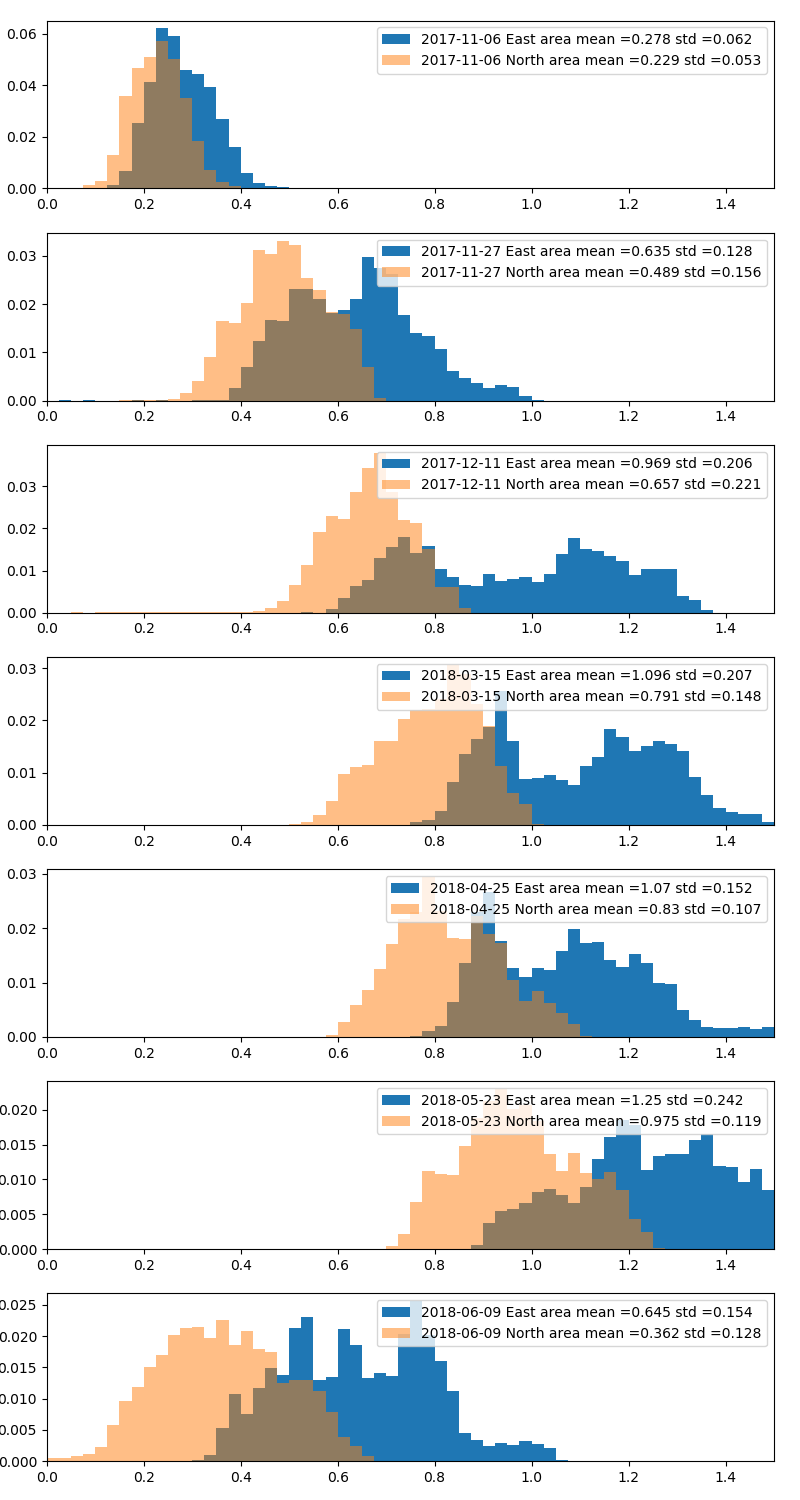

In [6]:
# Figure multiple
fh, axh = plt.subplots(nrows=7,ncols=1,figsize=[8,15])
plt.tight_layout()

for i, date in enumerate(['2017-11-06','2017-11-27','2017-12-11','2018-03-15','2018-04-25','2018-05-23','2018-06-09']):
#for i, date in enumerate(['2018-09-09','2018-04-25','2018-12-01','2019-01-10','2019-04-02','2019-05-15','2019-05-25']):
    umiest = umi.sel(time=date).where(umi.y < 0).z # selection de la zone Est
    uminord = umi.sel(time=date).where(umi.y > 0).z #selection de la zone nord  = loin de la bosse.
    umiest = umiest.to_series()
    uminord = uminord.to_series()
    axh[i].hist(umiest,bins=80,range=(0,2),weights=np.ones_like(umiest) / len(umiest),
               label=([date + ' East area mean ='+ str(round(umiest.mean(),3))+' std ='+ str(round(umiest.std(),3))]))#,fc=(i, 0, 0, 0.8))
    #zone nord  > 0
    axh[i].hist(uminord,bins=80,range=(0,2),weights=np.ones_like(uminord) / len(uminord),alpha=0.5,
                label=([date + ' North area mean ='+ str(round(uminord.mean(),3))+' std ='+ str(round(uminord.std(),3))]))#,fc=(i, 0, 0, 0.8))
    axh[i].set_xlim(0,1.5)
    axh[i].legend(loc='upper right')
    #axh[i].legend()

    
